# 데이터 준비

In [1]:
!pip install finance-datareader

In [2]:
import FinanceDataReader as fdr

In [3]:
# 삼성코드 : 005930
data = fdr.DataReader('005930','2018-10-20','2022-01-04')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 793 entries, 2018-10-22 to 2022-01-04
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    793 non-null    int64  
 1   High    793 non-null    int64  
 2   Low     793 non-null    int64  
 3   Close   793 non-null    int64  
 4   Volume  793 non-null    int64  
 5   Change  793 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 43.4 KB


In [5]:
data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-10-22,43450,43950,43200,43550,8357648,-0.007973
2018-10-23,43300,43450,42550,43050,9531231,-0.011481
2018-10-24,43050,43100,42250,42550,13522825,-0.011614
2018-10-25,40600,41550,40550,41000,19338170,-0.036428
2018-10-26,41100,41300,40400,41000,14413864,0.000000


In [6]:
data.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-28,80200,80400,79700,80300,18226325,0.001247
2021-12-29,80200,80200,78500,78800,19794795,-0.018680
2021-12-30,78900,79500,78100,78300,14236700,-0.006345
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272


## 각종지수

In [7]:
# ta library
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/
!pip install ta


  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=8b816812d73e31a238cfd68c6e17fd721aff5c0e539f2fdde227dab7061d5d3b
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [8]:
import pandas as pd
import numpy as np
import ta

In [9]:
# 볼린저 밴드
def bbands(data, days):
    MA = data.Close.rolling(window=days).mean()
    SD = data.Close.rolling(window=days).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data

days = 20
data = bbands(data, days)

In [10]:
# #rsi
# rsi = ta.momentum.rsi(close)
data['rsi'] = ta.momentum.rsi(data['Close'])

In [11]:
# macd
# macd = ta.trend.macd(close)
# macdsignal = ta.trend.macd_signal(close)
data['macd'] = ta.trend.macd(data['Close'])
data['macdsignal'] = ta.trend.macd_signal(data['Close'])

In [12]:
data['rsi_signal']=[1 if x<0 else 0 for x in data['rsi']]

In [13]:
data['BB_signal']=[1 if data.iloc[i]['Close']<data.iloc[i]['LowerBB'] else 0 for i in range(len(data))]

## 타겟설정

In [14]:
data['upNdown']=[1 if x>0 else 0 for x in data['Change']]
#하루전 변화량
data['upNdown_1ago']=data['upNdown'].shift(1)
data['upNdown_2ago']=data['upNdown'].shift(2)

In [15]:

data = data[19:]

In [16]:
data

,Open,High,Low,Close,Volume,Change,UpperBB,LowerBB,rsi,macd,macdsignal,rsi_signal,BB_signal,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,
2018-11-16,44600,44750,43700,44000,7777124,-0.005650,45714.598145,40840.401855,54.315101,NaN,NaN,0,0,0,1.0,0.0
2018-11-19,44050,44250,43450,43650,7538720,-0.007955,45722.360867,40842.639133,50.406012,NaN,NaN,0,0,0,0.0,1.0
2018-11-20,42450,43000,42100,42800,9420664,-0.019473,45717.426145,40822.573855,42.421064,NaN,NaN,0,0,0,0.0,0.0
2018-11-21,41800,42300,41800,42100,10769589,-0.016355,45730.807430,40764.192570,37.195386,NaN,NaN,0,0,0,0.0,0.0
2018-11-22,42000,42650,42000,42450,5970796,0.008314,45603.672020,41036.327980,41.102133,NaN,NaN,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,80200,80400,79700,80300,18226325,0.001247,81057.190146,74412.809854,69.708738,1764.900463,1599.946973,0,0,1,0.0,1.0
2021-12-29,80200,80200,78500,78800,19794795,-0.018680,80909.728592,75000.271408,59.381987,1637.141425,1607.385863,0,0,0,1.0,0.0
2021-12-30,78900,79500,78100,78300,14236700,-0.006345,80857.048793,75302.951207,56.383567,1478.502390,1581.609169,0,0,0,0.0,1.0


In [17]:
# 내일 예측을 위해 하루 땡김
data['Target']=data['upNdown'].shift(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data

,Open,High,Low,Close,Volume,Change,UpperBB,LowerBB,rsi,macd,macdsignal,rsi_signal,BB_signal,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,
2018-11-16,44600,44750,43700,44000,7777124,-0.005650,45714.598145,40840.401855,54.315101,NaN,NaN,0,0,0,1.0,0.0,0.0
2018-11-19,44050,44250,43450,43650,7538720,-0.007955,45722.360867,40842.639133,50.406012,NaN,NaN,0,0,0,0.0,1.0,0.0
2018-11-20,42450,43000,42100,42800,9420664,-0.019473,45717.426145,40822.573855,42.421064,NaN,NaN,0,0,0,0.0,0.0,0.0
2018-11-21,41800,42300,41800,42100,10769589,-0.016355,45730.807430,40764.192570,37.195386,NaN,NaN,0,0,0,0.0,0.0,1.0
2018-11-22,42000,42650,42000,42450,5970796,0.008314,45603.672020,41036.327980,41.102133,NaN,NaN,0,0,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,80200,80400,79700,80300,18226325,0.001247,81057.190146,74412.809854,69.708738,1764.900463,1599.946973,0,0,1,0.0,1.0,0.0
2021-12-29,80200,80200,78500,78800,19794795,-0.018680,80909.728592,75000.271408,59.381987,1637.141425,1607.385863,0,0,0,1.0,0.0,0.0
2021-12-30,78900,79500,78100,78300,14236700,-0.006345,80857.048793,75302.951207,56.383567,1478.502390,1581.609169,0,0,0,0.0,1.0,1.0


In [19]:
# data=data.drop('upNdown',axis=1)
data = data.dropna()

In [20]:
data=data[10:]

In [21]:
data

,Open,High,Low,Close,Volume,Change,UpperBB,LowerBB,rsi,macd,macdsignal,rsi_signal,BB_signal,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,
2018-12-20,38600,39100,38500,38650,11937617,-0.011509,44225.913306,37789.086694,30.304823,-1113.129259,-895.255313,0,0,0,1.0,0.0,0.0
2018-12-21,38200,38650,38100,38650,14947080,0.000000,44132.400942,37507.599058,30.304823,-1130.550824,-942.314415,0,0,0,0.0,1.0,1.0
2018-12-24,38500,39050,38300,38800,9729530,0.003881,43948.433365,37311.566635,32.090245,-1119.350617,-977.721656,0,0,1,0.0,0.0,0.0
2018-12-26,38400,38750,38300,38350,12707675,-0.011598,43657.046500,37132.953500,29.637327,-1133.716829,-1008.920690,0,0,0,1.0,0.0,0.0
2018-12-27,38700,38800,38100,38250,10510643,-0.002608,43273.931396,37026.068604,29.104914,-1140.029766,-1035.142506,0,0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,81470.325240,73099.674760,69.379089,1749.568900,1558.708600,0,0,0,1.0,1.0,1.0
2021-12-28,80200,80400,79700,80300,18226325,0.001247,81057.190146,74412.809854,69.708738,1764.900463,1599.946973,0,0,1,0.0,1.0,0.0
2021-12-29,80200,80200,78500,78800,19794795,-0.018680,80909.728592,75000.271408,59.381987,1637.141425,1607.385863,0,0,0,1.0,0.0,0.0


## 학습

### train test split

In [22]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    return df_copy

In [23]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.2, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(data)

In [24]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0.0    50.083472
1.0    49.916528
Name: Target, dtype: float64
테스트 데이터 레이블 값 비율
1.0    50.0
0.0    50.0
Name: Target, dtype: float64


### 스코어

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


# LigtGBM score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### XGBM 모델 학습과 하이퍼 파라미터 튜닝

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[0]	validation_0-auc:0.600229	validation_1-auc:0.512
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.667046	validation_1-auc:0.561689
[2]	validation_0-auc:0.665931	validation_1-auc:0.553511
[3]	validation_0-auc:0.682386	validation_1-auc:0.540444
[4]	validation_0-auc:0.707469	validation_1-auc:0.544444
[5]	validation_0-auc:0.71311	validation_1-auc:0.557333
[6]	validation_0-auc:0.727363	validation_1-auc:0.557867
[7]	validation_0-auc:0.725173	validation_1-auc:0.562933
[8]	validation_0-auc:0.741477	validation_1-auc:0.5592
[9]	validation_0-auc:0.742715	validation_1-auc:0.557067
[10]	validation_0-auc:0.75539	validation_1-auc:0.550044
[11]	validation_0-auc:0.764805	validation_1-auc:0.555822
[12]	validation_0-auc:0.774889	validation_1-auc:0.567911
[13]	validation_0-auc:0.782826	validation_1-auc:0.568267
[14]	validation_0-auc:0.785747	validation_1-auc:0.572444
[15]

In [27]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[0]	validation_0-auc:0.591973	validation_1-auc:0.467822
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.701499	validation_1-auc:0.484267
[2]	validation_0-auc:0.711472	validation_1-auc:0.472711
[3]	validation_0-auc:0.724114	validation_1-auc:0.477511
[4]	validation_0-auc:0.731048	validation_1-auc:0.458578
[5]	validation_0-auc:0.751048	validation_1-auc:0.461778
[6]	validation_0-auc:0.767514	validation_1-auc:0.448533
[7]	validation_0-auc:0.775006	validation_1-auc:0.457156
[8]	validation_0-auc:0.787999	validation_1-auc:0.446222
[9]	validation_0-auc:0.791644	validation_1-auc:0.456444
[10]	validation_0-auc:0.794142	validation_1-auc:0.450311
[11]	validation_0-auc:0.804264	validation_1-auc:0.478044
[12]	validation_0-auc:0.80364	validation_1-auc:0.471822
[13]	validation_0-auc:0.807369	validation_1-auc:0.469689
[14]	validation_0-auc:0.805992	validation_1-auc:0.473333

In [28]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[0]	validation_0-auc:0.756031	validation_1-auc:0.496533
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.788763	validation_1-auc:0.490578
[2]	validation_0-auc:0.824666	validation_1-auc:0.500711
[3]	validation_0-auc:0.847837	validation_1-auc:0.538222
[4]	validation_0-auc:0.866433	validation_1-auc:0.558578
[5]	validation_0-auc:0.861611	validation_1-auc:0.555556
[6]	validation_0-auc:0.86854	validation_1-auc:0.5632
[7]	validation_0-auc:0.869967	validation_1-auc:0.556711
[8]	validation_0-auc:0.876633	validation_1-auc:0.547822
[9]	validation_0-auc:0.88388	validation_1-auc:0.553244
[10]	validation_0-auc:0.900686	validation_1-auc:0.551467
[11]	validation_0-auc:0.907391	validation_1-auc:0.546133
[12]	validation_0-auc:0.907168	validation_1-auc:0.544178
[13]	validation_0-auc:0.911817	validation_1-auc:0.534667
[14]	validation_0-auc:0.908941	validation_1-auc:0.537156
[

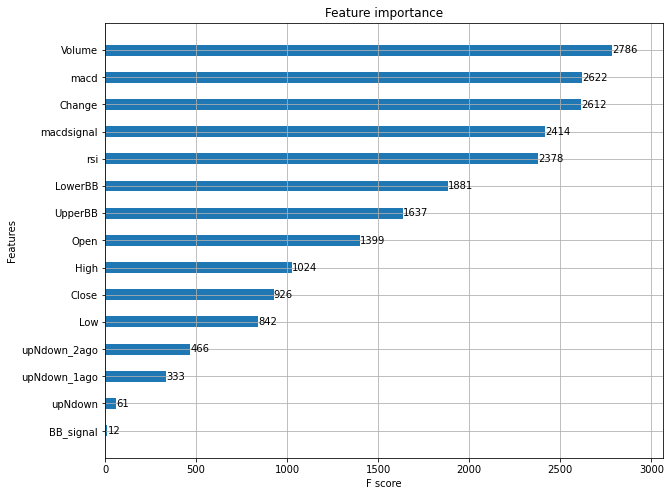

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [30]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[1]	valid_0's auc: 0.548533	valid_0's binary_logloss: 0.69114
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.570311	valid_0's binary_logloss: 0.687995
[3]	valid_0's auc: 0.5616	valid_0's binary_logloss: 0.686876
[4]	valid_0's auc: 0.521156	valid_0's binary_logloss: 0.692731
[5]	valid_0's auc: 0.518311	valid_0's binary_logloss: 0.695303
[6]	valid_0's auc: 0.503556	valid_0's binary_logloss: 0.703422
[7]	valid_0's auc: 0.496889	valid_0's binary_logloss: 0.706593
[8]	valid_0's auc: 0.488	valid_0's binary_logloss: 0.711941
[9]	valid_0's auc: 0.474667	valid_0's binary_logloss: 0.71783
[10]	valid_0's auc: 0.479556	valid_0's binary_logloss: 0.718816
[11]	valid_0's auc: 0.481511	valid_0's binary_logloss: 0.721735
[12]	valid_0's auc: 0.476356	valid_0's binary_logloss: 0.725791
[13]	valid_0's auc: 0.487378	valid_0's binary_logloss: 0.724689
[14]	valid_0's auc: 0.476444	valid_0's binary_logloss: 0.73224
[15]	valid_0's auc: 0.484978	valid_0's binary_logloss: 0.7

In [31]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[1]	valid_0's auc: 0.58757	valid_0's binary_logloss: 0.689611	valid_1's auc: 0.564622	valid_1's binary_logloss: 0.690639
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.596611	valid_0's binary_logloss: 0.68726	valid_1's auc: 0.545244	valid_1's binary_logloss: 0.690208
[3]	valid_0's auc: 0.613456	valid_0's binary_logloss: 0.684726	valid_1's auc: 0.547378	valid_1's binary_logloss: 0.689597
[4]	valid_0's auc: 0.624515	valid_0's binary_logloss: 0.683213	valid_1's auc: 0.561422	valid_1's binary_logloss: 0.689069
[5]	valid_0's auc: 0.626912	valid_0's binary_logloss: 0.681821	valid_1's auc: 0.578489	valid_1's binary_logloss: 0.687369
[6]	valid_0's auc: 0.647168	valid_0's binary_logloss: 0.67666	valid_1's auc: 0.565156	valid_1's binary_logloss: 0.689466
[7]	valid_0's auc: 0.653244	valid_0's binary_logloss: 0.674888	valid_1's auc: 0.547556	valid_1's binary_logloss: 0.692134
[8]	valid_0's auc: 0.656912	valid_0's binary_logloss: 0.670801	valid_1's auc: 0.536711	

In [32]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[1]	valid_0's auc: 0.519378	valid_0's binary_logloss: 0.692905
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.502756	valid_0's binary_logloss: 0.692843
[3]	valid_0's auc: 0.5184	valid_0's binary_logloss: 0.692564
[4]	valid_0's auc: 0.4984	valid_0's binary_logloss: 0.692882
[5]	valid_0's auc: 0.518756	valid_0's binary_logloss: 0.693332
[6]	valid_0's auc: 0.513156	valid_0's binary_logloss: 0.693697
[7]	valid_0's auc: 0.527556	valid_0's binary_logloss: 0.694485
[8]	valid_0's auc: 0.519289	valid_0's binary_logloss: 0.693707
[9]	valid_0's auc: 0.5128	valid_0's binary_logloss: 0.694771
[10]	valid_0's auc: 0.502311	valid_0's binary_logloss: 0.695778
[11]	valid_0's auc: 0.499111	valid_0's binary_logloss: 0.696629
[12]	valid_0's auc: 0.501778	valid_0's binary_logloss: 0.696848
[13]	valid_0's auc: 0.497333	valid_0's binary_logloss: 0.697881
[14]	valid_0's auc: 0.503911	valid_0's binary_logloss: 0.697638
[15]	valid_0's auc: 0.507644	valid_0's binary_logloss: 0

### Scaler

In [33]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 macd 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    macd_s = scaler.fit_transform(df_copy['macd'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(12, 'macd_Scaled', macd_s)
    macdsignal_s = scaler.fit_transform(df_copy['macdsignal'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(13, 'macdsignal_Scaled', macdsignal_s)
   
    
#     # 넘파이의 log1p( )를 이용하여 Volume_n를 로그 변환 
#     Volume_n = np.log1p(df_copy['Volume'])
#     df_copy.insert(4, 'Volume_Scaled', Volume_n)
    
    
     # 기존 'macd','macdsignal' 피처 삭제
    df_copy.drop(['macd','macdsignal'], axis=1, inplace=True)
    
    return df_copy

## 학습

### train test split

In [34]:
X_train, X_test, y_train, y_test = get_train_test_dataset(data)

In [35]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0.0    50.083472
1.0    49.916528
Name: Target, dtype: float64
테스트 데이터 레이블 값 비율
1.0    50.0
0.0    50.0
Name: Target, dtype: float64


### 스코어

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


# LigtGBM score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### XGBM 모델 학습과 하이퍼 파라미터 튜닝

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[0]	validation_0-auc:0.600229	validation_1-auc:0.512
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.667046	validation_1-auc:0.561689
[2]	validation_0-auc:0.665931	validation_1-auc:0.553511
[3]	validation_0-auc:0.682386	validation_1-auc:0.540444
[4]	validation_0-auc:0.707469	validation_1-auc:0.544444
[5]	validation_0-auc:0.71311	validation_1-auc:0.557333
[6]	validation_0-auc:0.727363	validation_1-auc:0.557867
[7]	validation_0-auc:0.725173	validation_1-auc:0.562933
[8]	validation_0-auc:0.741477	validation_1-auc:0.5592
[9]	validation_0-auc:0.742715	validation_1-auc:0.557067
[10]	validation_0-auc:0.75539	validation_1-auc:0.550044
[11]	validation_0-auc:0.764805	validation_1-auc:0.555822
[12]	validation_0-auc:0.774889	validation_1-auc:0.567911
[13]	validation_0-auc:0.782826	validation_1-auc:0.568267
[14]	validation_0-auc:0.785747	validation_1-auc:0.572444
[15]

In [38]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[0]	validation_0-auc:0.591973	validation_1-auc:0.467822
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.70068	validation_1-auc:0.507911
[2]	validation_0-auc:0.710557	validation_1-auc:0.490844
[3]	validation_0-auc:0.72228	validation_1-auc:0.496533
[4]	validation_0-auc:0.735033	validation_1-auc:0.463556
[5]	validation_0-auc:0.751466	validation_1-auc:0.4608
[6]	validation_0-auc:0.773088	validation_1-auc:0.439556
[7]	validation_0-auc:0.776137	validation_1-auc:0.459378
[8]	validation_0-auc:0.790624	validation_1-auc:0.421422
[9]	validation_0-auc:0.794169	validation_1-auc:0.4256
[10]	validation_0-auc:0.798239	validation_1-auc:0.430222
[11]	validation_0-auc:0.807681	validation_1-auc:0.449422
[12]	validation_0-auc:0.81432	validation_1-auc:0.430667
[13]	validation_0-auc:0.814337	validation_1-auc:0.4328
[14]	validation_0-auc:0.813824	validation_1-auc:0.445333
[15]	va

In [39]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[0]	validation_0-auc:0.774242	validation_1-auc:0.499644
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.830318	validation_1-auc:0.536889
[2]	validation_0-auc:0.865775	validation_1-auc:0.537333
[3]	validation_0-auc:0.876215	validation_1-auc:0.533778
[4]	validation_0-auc:0.878629	validation_1-auc:0.541778
[5]	validation_0-auc:0.891165	validation_1-auc:0.522578
[6]	validation_0-auc:0.901037	validation_1-auc:0.526133
[7]	validation_0-auc:0.903439	validation_1-auc:0.528622
[8]	validation_0-auc:0.913818	validation_1-auc:0.527556
[9]	validation_0-auc:0.913896	validation_1-auc:0.534489
[10]	validation_0-auc:0.917754	validation_1-auc:0.529156
[11]	validation_0-auc:0.921873	validation_1-auc:0.521333
[12]	validation_0-auc:0.921394	validation_1-auc:0.524
[13]	validation_0-auc:0.923043	validation_1-auc:0.5128
[14]	validation_0-auc:0.922302	validation_1-auc:0.516711
[1

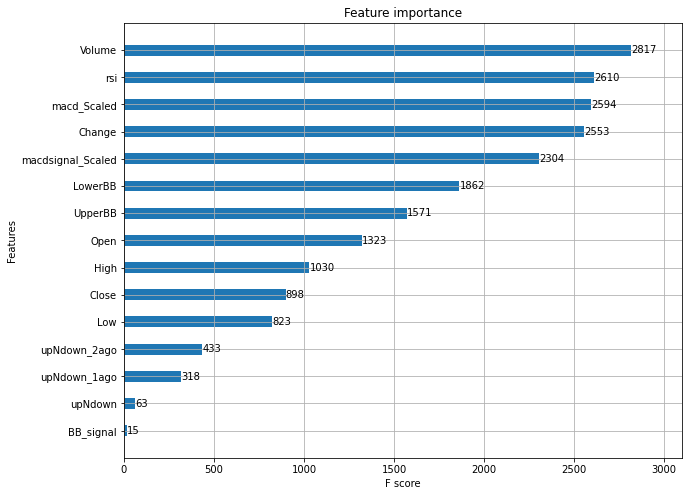

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [41]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[1]	valid_0's auc: 0.548533	valid_0's binary_logloss: 0.69114
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.570311	valid_0's binary_logloss: 0.687995
[3]	valid_0's auc: 0.566044	valid_0's binary_logloss: 0.686325
[4]	valid_0's auc: 0.524533	valid_0's binary_logloss: 0.692151
[5]	valid_0's auc: 0.519733	valid_0's binary_logloss: 0.694698
[6]	valid_0's auc: 0.504978	valid_0's binary_logloss: 0.702801
[7]	valid_0's auc: 0.501244	valid_0's binary_logloss: 0.705953
[8]	valid_0's auc: 0.488978	valid_0's binary_logloss: 0.711291
[9]	valid_0's auc: 0.478044	valid_0's binary_logloss: 0.717168
[10]	valid_0's auc: 0.480089	valid_0's binary_logloss: 0.71816
[11]	valid_0's auc: 0.477867	valid_0's binary_logloss: 0.722726
[12]	valid_0's auc: 0.479289	valid_0's binary_logloss: 0.7252
[13]	valid_0's auc: 0.477422	valid_0's binary_logloss: 0.730585
[14]	valid_0's auc: 0.468622	valid_0's binary_logloss: 0.735405
[15]	valid_0's auc: 0.472356	valid_0's binary_logloss:

In [42]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[1]	valid_0's auc: 0.58757	valid_0's binary_logloss: 0.689611	valid_1's auc: 0.564622	valid_1's binary_logloss: 0.690639
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.596611	valid_0's binary_logloss: 0.68726	valid_1's auc: 0.545244	valid_1's binary_logloss: 0.690208
[3]	valid_0's auc: 0.613456	valid_0's binary_logloss: 0.684726	valid_1's auc: 0.547378	valid_1's binary_logloss: 0.689597
[4]	valid_0's auc: 0.624515	valid_0's binary_logloss: 0.683213	valid_1's auc: 0.561422	valid_1's binary_logloss: 0.689069
[5]	valid_0's auc: 0.626912	valid_0's binary_logloss: 0.681821	valid_1's auc: 0.578489	valid_1's binary_logloss: 0.687369
[6]	valid_0's auc: 0.647168	valid_0's binary_logloss: 0.67666	valid_1's auc: 0.565156	valid_1's binary_logloss: 0.689466
[7]	valid_0's auc: 0.653244	valid_0's binary_logloss: 0.674888	valid_1's auc: 0.547556	valid_1's binary_logloss: 0.692134
[8]	valid_0's auc: 0.656912	valid_0's binary_logloss: 0.670801	valid_1's auc: 0.536711	

In [43]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[1]	valid_0's auc: 0.519378	valid_0's binary_logloss: 0.692905
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.502756	valid_0's binary_logloss: 0.692843
[3]	valid_0's auc: 0.5184	valid_0's binary_logloss: 0.692564
[4]	valid_0's auc: 0.4984	valid_0's binary_logloss: 0.692882
[5]	valid_0's auc: 0.518756	valid_0's binary_logloss: 0.693332
[6]	valid_0's auc: 0.527111	valid_0's binary_logloss: 0.693311
[7]	valid_0's auc: 0.528978	valid_0's binary_logloss: 0.693145
[8]	valid_0's auc: 0.517956	valid_0's binary_logloss: 0.693664
[9]	valid_0's auc: 0.521689	valid_0's binary_logloss: 0.69292
[10]	valid_0's auc: 0.513956	valid_0's binary_logloss: 0.693833
[11]	valid_0's auc: 0.507378	valid_0's binary_logloss: 0.694508
[12]	valid_0's auc: 0.502844	valid_0's binary_logloss: 0.695625
[13]	valid_0's auc: 0.510844	valid_0's binary_logloss: 0.695266
[14]	valid_0's auc: 0.5064	valid_0's binary_logloss: 0.696282
[15]	valid_0's auc: 0.514044	valid_0's binary_logloss: 0.

In [44]:
X_train

,Open,High,Low,Close,Volume,Change,UpperBB,LowerBB,rsi,rsi_signal,macd_Scaled,macdsignal_Scaled,BB_signal,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,
2021-12-15,76400,77600,76300,77600,9584939,0.007792,79781.871285,70158.128715,64.584544,0,1.006518,0.882235,0,1,1.0,0.0
2021-02-03,84800,85400,83400,84600,22112205,0.002370,92147.065772,81272.934228,53.270744,0,0.926269,1.934052,0,1,1.0,1.0
2020-06-05,54400,55900,54000,55500,22743629,0.016484,54764.622694,45715.377306,75.526008,0,0.784603,0.231039,0,1,1.0,1.0
2019-10-04,47400,48650,47350,48000,9331695,0.008403,50655.465673,44944.534327,55.448493,0,0.490618,0.642269,0,1,0.0,0.0
2021-07-28,78300,79200,78100,79200,12743417,0.008917,81128.834124,78191.165876,45.762378,0,-0.676515,-0.658448,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,78900,79400,78800,79400,17105892,0.016645,80647.358244,71692.641756,68.281463,0,1.025029,1.002984,0,1,1.0,0.0
2019-05-20,41650,42100,41550,42000,15752397,0.019417,47195.926456,40839.073544,34.367763,0,-1.152867,-0.924560,0,1,0.0,0.0
2021-05-24,80100,80400,79500,79700,13398666,-0.004994,84170.022563,78279.977437,41.045702,0,-1.036373,-0.953731,0,0,1.0,0.0
